In [1]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

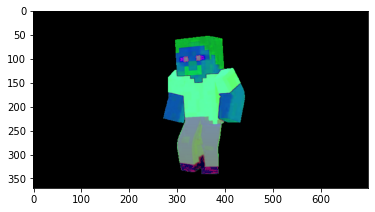

In [3]:
img = cv2.imread(r'C:\Users\rnr31\Documents\GitHub\opencv-mini-projects\Green_screen\images\img1.png')
rgb_h = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_h = cv2.cvtColor(rgb_h, cv2.COLOR_RGB2HSV)
## Masking green screen
lower_bounds = (45, 100, 20)
upper_bounds = (72, 255, 255)

mask = cv2.inRange(hsv_h, lower_bounds, upper_bounds)

masked_h = hsv_h.copy()
masked_h[mask!=0] = [0,0,0]

plt.imshow(masked_h)



In [4]:
back_img = cv2.imread(r'C:\Users\rnr31\Documents\GitHub\opencv-mini-projects\Green_screen\images\back1.png')
rgb_bg = cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB)
rgb_bg = cv2.resize(rgb_bg, (img.shape[1], img.shape[0]))
hsv_bg = cv2.cvtColor(rgb_bg, cv2.COLOR_RGB2HSV)
hsv_bg[mask == 0] = [0,0,0]

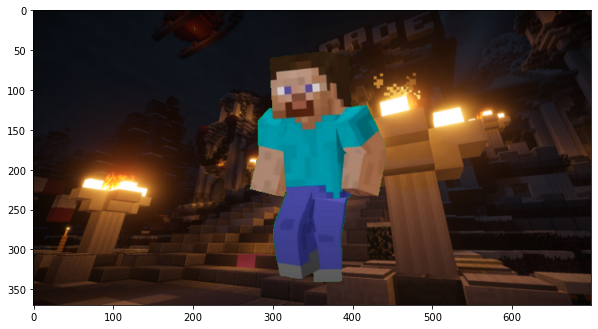

In [5]:
full_image = masked_h + hsv_bg
full_image = cv2.cvtColor(full_image, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,15))
plt.imshow(full_image)